In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [45]:
house = pd.read_csv("WestRoxbury.csv")

In [46]:
house.head()

,TOTAL VALUE,TAX,LOT SQFT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE
0,344.2,4330,9965,2436,1352,2.0,6,3,1,1,1,0
1,412.6,5190,6590,3108,1976,2.0,10,4,2,1,1,0
2,330.1,4152,7500,2294,1371,2.0,8,4,1,1,1,0
3,498.6,6272,13773,5032,2608,1.0,9,5,1,1,1,1
4,331.5,4170,5000,2370,1438,2.0,7,3,2,0,1,0


In [47]:
print (house.columns.values) # print out name of columns for future use, less typos this way/

['TOTAL VALUE' 'TAX' 'LOT SQFT' 'GROSS AREA' 'LIVING AREA' 'FLOORS'
 'ROOMS' 'BEDROOMS' 'FULL BATH' 'HALF BATH' 'KITCHEN' 'FIREPLACE']


In [48]:
select_index = ['GROSS AREA','FLOORS','ROOMS' ]
house_X = house.loc[:, select_index]  # Attribute matrix will always be represented by capital X in variable name

house_y = house.iloc[:,0] # target matrix represented by small y in variable name


In [49]:
X_train, X_valid, y_train, y_valid = train_test_split (house_X, house_y, test_size = 0.3, random_state = 42)

In [50]:
X_train

,GROSS AREA,FLOORS,ROOMS
2617,4012,2.0,7
5075,4020,2.0,9
1293,2204,2.0,6
5251,2326,1.5,7
4850,2316,2.0,7
...,...,...,...
3772,2883,1.0,6
5191,2988,2.0,7
5226,2711,2.0,6
5390,5576,2.0,8


In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # in future when changing to a different model just change the name of the model here.

In [52]:
model.fit( X_train, y_train )

LinearRegression()

In [53]:
import numpy as np
np.set_printoptions (precision = 4, suppress = True) # 4 decimal point and suppresses scientific notation

print (model.coef_) #b1,b2,b3


[ 0.0737 52.3036  6.4232]


In [54]:
print ('%.4f' % model.intercept_) # b0

43.6325


In [55]:
y_pred = model.predict( X_valid )

In [56]:
y_pred

array([324.3635, 348.965 , 301.3124, ..., 347.4252, 536.5331, 359.0932])

In [57]:
y_new_pred = model.predict ([ [2655,1.5,6 ],[2000,2, 5] ])
y_new_pred

array([356.1869, 327.6701])

In [58]:
e = y_valid - y_pred

In [59]:
np.mean(np.abs(e))

40.61120379680035

In [60]:
y_pred_train = model.predict(X_train)
e_train = y_train - y_pred_train
np.mean(np.abs(e_train))

39.888448920005914

In [61]:
#Regression Practice

In [62]:
tayko = pd.read_csv('Tayko.csv')

In [63]:
tayko.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0


In [64]:
tayko.columns.values

array(['sequence_number', 'US', 'source_a', 'source_c', 'source_b',
       'source_d', 'source_e', 'source_m', 'source_o', 'source_h',
       'source_r', 'source_s', 'source_t', 'source_u', 'source_p',
       'source_x', 'source_w', 'Freq', 'last_update_days_ago',
       '1st_update_days_ago', 'Web order', 'Gender=male',
       'Address_is_res', 'Purchase', 'Spending'], dtype=object)

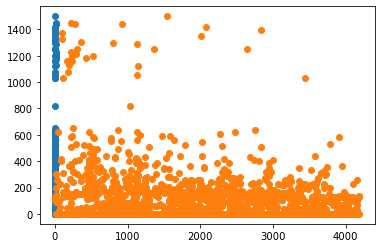

In [65]:
from matplotlib import pyplot as plt

plt.scatter ( tayko.loc[:,'Freq'], tayko.loc[:,'Spending'])
plt.scatter ( tayko.loc[:,'last_update_days_ago'], tayko.loc[:,'Spending'])


In [66]:
select_index = ['US','Freq','last_update_days_ago', 'Web order','Gender=male', 'Address_is_res' ]
tayko_X = tayko.loc [:,select_index]
print (tayko_X)

tayko_y = tayko.iloc[:,-1]



      US  Freq  last_update_days_ago  Web order  Gender=male  Address_is_res
0      1     2                  3662          1            0               1
1      1     0                  2900          1            1               0
2      1     2                  3883          0            0               0
3      1     1                   829          0            1               0
4      1     1                   869          0            0               0
...   ..   ...                   ...        ...          ...             ...
1995   1     1                  1701          1            0               0
1996   1     1                  2633          1            1               0
1997   1     0                  3394          0            0               0
1998   1     1                   253          0            1               1
1999   1     1                  1261          0            0               0

[2000 rows x 6 columns]


In [67]:
X_train, X_valid, y_train, y_valid = train_test_split (tayko_X, tayko_y, test_size = 0.25, random_state = 1)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
model = LinearRegression()

In [70]:
X_train

,US,Freq,last_update_days_ago,Web order,Gender=male,Address_is_res
650,1,1,2759,0,1,0
1104,1,3,455,0,0,1
561,1,2,1995,1,0,1
643,1,1,2704,1,1,0
441,1,1,535,0,1,1
...,...,...,...,...,...,...
1791,1,2,2366,1,1,0
1096,1,1,1010,1,0,0
1932,1,0,3619,1,1,0
235,1,1,1946,1,0,0


In [71]:
model.fit(X_train, y_train)

LinearRegression()

In [72]:

np.set_printoptions (precision = 4, suppress = True)
print(model.coef_)

[ -3.6309  90.9795  -0.0088  18.6232  -6.5609 -77.4037]


In [73]:
print ('%.4f' % model.intercept_) # b0

5.2257


In [74]:
y_pred =  model.predict(X_valid)

In [77]:
e = y_valid - y_pred
np.sqrt(np.mean(e**2))

156.94191519849505

In [78]:
y_pred_train = model.predict(X_train)
e_train = y_pred_train - y_train
np.sqrt(np.mean(e_train**2))

120.1899094879747